In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
iris_train = pd.read_csv('C:/Users/User/Desktop/dtml/train_iris.csv', index_col=0)
iris_test = pd.read_csv('C:/Users/User/Desktop/dtml/test_iris.csv', index_col=0)

In [8]:
iris_train

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [9]:
iris_test

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0
125,7.2,3.2,6.0,1.8,2
36,5.5,3.5,1.3,0.2,0
141,6.9,3.1,5.1,2.3,2
12,4.8,3.0,1.4,0.1,0
63,6.1,2.9,4.7,1.4,1


In [10]:
X_train = iris_train.drop(['species'], axis=1)
y_train = iris_train.species

In [11]:
X_test = iris_test.drop(['species'], axis=1)
y_test = iris_test.species

In [12]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [13]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [14]:
np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
data = pd.DataFrame()

In [16]:
max_depth_values = range(1, 100)

In [19]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_data = pd.DataFrame({'max_depth':[max_depth], 
                                'train_score':[train_score], 
                                'test_score':[test_score],
                                'cross_val_score':[mean_cross_val_score]})
    data = data.append(temp_data)

In [20]:
data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.92,0.96


In [21]:
data_short = pd.melt(data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [22]:
data_short.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

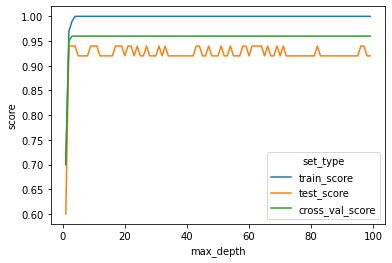

In [25]:
sns.lineplot(data=data_short, x='max_depth', y='score', hue='set_type')

## load iris

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
dt = tree.DecisionTreeClassifier()

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
predicted = dt.predict(X_test)

In [11]:
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

## GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

In [24]:
dt = tree.DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
parameters = {'max_depth':range(1,10), 'min_samples_leaf':range(2,10), 'min_samples_leaf':range(1,10)}

In [29]:
search = GridSearchCV(dt, parameters, cv=5)

In [30]:
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)})

In [31]:
best_tree = search.best_estimator_
best_tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=4)>